<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Sushant/DLS_Assignment_3_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import librosa
import librosa.display
import timeit
from IPython.display import Audio
from sklearn.model_selection import train_test_split
import soundfile as sf
from tensorflow.keras.layers import Conv1D,Conv2D,MaxPooling1D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten
from keras.models import Model
import pickle
import tarfile

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.2003898880000037
GPU (s):
0.04204798600000004
GPU speedup over CPU: 76x


In [4]:
def unpickle(file):
    #import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
cifar10 = keras.datasets.cifar10

In [6]:
cifar10

<module 'keras.api._v2.keras.datasets.cifar10' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/cifar10/__init__.py'>

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [8]:
print("The shape of training set is : ",x_train.shape)
print("The shape of training labels is : ",y_train.shape)
print("The shape of testing set is : ",x_test.shape)
print("The shape of testing labels is : ",y_test.shape)

The shape of training set is :  (50000, 32, 32, 3)
The shape of training labels is :  (50000, 1)
The shape of testing set is :  (10000, 32, 32, 3)
The shape of testing labels is :  (10000, 1)


In [9]:
print("The size of training set is : ",len(x_train))
print("The size of training labels is : ",len(y_train))
print("The size of testing set is : ",len(x_test))
print("The size of testing labels is : ",len(y_test))

The size of training set is :  50000
The size of training labels is :  50000
The size of testing set is :  10000
The size of testing labels is :  10000


In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
X_train,X_val,Y_train,Y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=6)

In [12]:
X_train.shape

(45000, 32, 32, 3)

In [13]:
Y_train.shape

(45000, 1)

In [14]:
X_train

array([[[[163, 177, 156],
         [ 91, 116,  85],
         [ 92, 126,  87],
         ...,
         [112, 151, 100],
         [ 77, 109,  72],
         [134, 153, 130]],

        [[100, 124,  86],
         [128, 154, 119],
         [172, 202, 167],
         ...,
         [157, 190, 145],
         [155, 183, 155],
         [ 94, 118,  95]],

        [[101, 132,  86],
         [154, 184, 142],
         [ 83, 118,  68],
         ...,
         [ 62,  96,  39],
         [133, 161, 127],
         [139, 167, 136]],

        ...,

        [[119, 149, 114],
         [135, 169, 132],
         [ 68, 101,  38],
         ...,
         [ 52,  89,  18],
         [ 94, 132,  76],
         [151, 181, 145]],

        [[ 90, 117,  83],
         [154, 182, 150],
         [130, 159, 119],
         ...,
         [ 90, 124,  77],
         [156, 186, 146],
         [111, 138, 104]],

        [[130, 151, 121],
         [ 96, 123,  90],
         [156, 185, 152],
         ...,
         [173, 202, 170],
        

In [15]:
Y_train

array([[2],
       [3],
       [1],
       ...,
       [7],
       [8],
       [3]], dtype=uint8)

In [16]:
Y_val.shape

(5000, 1)

In [17]:
Y_train.shape

(45000, 1)

In [18]:
# One hot encoding the train and validation labels
#Y_train = to_categorical(Y_train)
#Y_val = to_categorical(Y_val)
#y_test = to_categorical(y_test)

In [19]:
Y_train[0]

array([2], dtype=uint8)

In [20]:
print('Min: %.3f, Max: %.3f' % (X_train.min(), X_train.max()))

Min: 0.000, Max: 255.000


In [21]:
X_train

array([[[[163, 177, 156],
         [ 91, 116,  85],
         [ 92, 126,  87],
         ...,
         [112, 151, 100],
         [ 77, 109,  72],
         [134, 153, 130]],

        [[100, 124,  86],
         [128, 154, 119],
         [172, 202, 167],
         ...,
         [157, 190, 145],
         [155, 183, 155],
         [ 94, 118,  95]],

        [[101, 132,  86],
         [154, 184, 142],
         [ 83, 118,  68],
         ...,
         [ 62,  96,  39],
         [133, 161, 127],
         [139, 167, 136]],

        ...,

        [[119, 149, 114],
         [135, 169, 132],
         [ 68, 101,  38],
         ...,
         [ 52,  89,  18],
         [ 94, 132,  76],
         [151, 181, 145]],

        [[ 90, 117,  83],
         [154, 182, 150],
         [130, 159, 119],
         ...,
         [ 90, 124,  77],
         [156, 186, 146],
         [111, 138, 104]],

        [[130, 151, 121],
         [ 96, 123,  90],
         [156, 185, 152],
         ...,
         [173, 202, 170],
        

In [22]:
#X_train = X_train.astype('float32')
#X_val = X_val.astype('float32')
#x_test = x_test.astype('float32')

X_train = X_train/255
X_val = X_val/255
x_test = x_test/255

In [23]:
print('Min: %.3f, Max: %.3f' % (X_train.min(), X_train.max()))

Min: 0.000, Max: 1.000


In [24]:
print('Min: %.3f, Max: %.3f' % (X_val.min(), X_val.max()))

Min: 0.000, Max: 1.000


In [25]:
print('Min: %.3f, Max: %.3f' % (x_test.min(), x_test.max()))

Min: 0.000, Max: 1.000


### Rescale to [-1,1]

In [26]:
def rescale(data):
  data = tf.math.divide(
   tf.subtract(
      data, 
      tf.reduce_min(data)
   ), 
   tf.subtract(
      tf.reduce_max(data), 
      tf.reduce_min(data)
   )
  )
  return 2*data-1

In [27]:
X_train_new = tf.convert_to_tensor(X_train)
X_val_new = tf.convert_to_tensor(X_val)
x_test_new = tf.convert_to_tensor(x_test)

In [28]:
X_train_new = rescale(X_train_new)
X_val_new = rescale(X_val_new)
x_test_new = rescale(x_test_new)

In [29]:
x_test_new.shape

TensorShape([10000, 32, 32, 3])

In [30]:
type(x_test_new)

tensorflow.python.framework.ops.EagerTensor

### Model Architecture:
#### 1st 2d conv layer: there are 10 kernels whose size is 5x5x3; stride=1
#### Maxpooling: 2x2 with stride=2
#### 1st 2d conv layer: there are 10 kernels whose size is 5x5x10; stride=1
#### Maxpooling: 2x2 with stride=2
#### 1st fully-connected layer: [flattened final feature map] x 20
#### 2st fully-connected layer: 20 x 10 Softmax on the 10 classes

In [31]:
kaiming_he = keras.initializers.HeNormal()

In [32]:
model_1 = keras.Sequential([
              layers.Conv2D(filters=10, kernel_size=(5,5), strides=(1,1), activation='relu', kernel_initializer=kaiming_he, data_format = 'channels_last', input_shape=(32,32,3)),
              layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
              layers.Conv2D(filters=10, kernel_size=(5,5), strides=(1,1), activation='relu',kernel_initializer=kaiming_he, data_format = 'channels_last'),
              layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
              layers.Flatten(),
              layers.Dense(units=20, activation="relu", kernel_initializer=kaiming_he),
              layers.Dense(units=10, activation="softmax", kernel_initializer=kaiming_he)
])

In [33]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=["acc"])

In [34]:
history_1 = model_1.fit(X_train_new, Y_train, epochs=200, batch_size=64, validation_data=(X_val_new, Y_val))

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


704/704 [==============================] - 5s 5ms/step - loss: 1.7638 - acc: 0.3601 - val_loss: 1.5100 - val_acc: 0.4666
Epoch 2/200
704/704 [==============================] - 3s 4ms/step - loss: 1.4019 - acc: 0.4978 - val_loss: 1.3380 - val_acc: 0.5296
Epoch 3/200
704/704 [==============================] - 3s 4ms/step - loss: 1.2953 - acc: 0.5380 - val_loss: 1.2789 - val_acc: 0.5480
Epoch 4/200
704/704 [==============================] - 3s 4ms/step - loss: 1.2323 - acc: 0.5622 - val_loss: 1.2242 - val_acc: 0.5718
Epoch 5/200
704/704 [==============================] - 3s 4ms/step - loss: 1.1861 - acc: 0.5787 - val_loss: 1.2271 - val_acc: 0.5742
Epoch 6/200
704/704 [==============================] - 4s 5ms/step - loss: 1.1572 - acc: 0.5914 - val_loss: 1.1487 - val_acc: 0.5972
Epoch 7/200
704/704 [==============================] - 4s 5ms/step - loss: 1.1305 - acc: 0.6007 - val_loss: 1.1779 - val_acc: 0.5948
Epoch 8/200
704/704 [==============================] - 3s 4ms/step - loss: 1.1068

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [36]:
!ls /content/gdrive/MyDrive/DLS_Assignments/

'Assignment2 Data'   Models


In [37]:
path = '/content/gdrive/MyDrive/DLS_Assignments/Models/assign3_model_1.h5'
model_1.save(path)

In [38]:
model = keras.models.load_model(path)

## Graph for Model_1

## Data Augmentation

#### Data 1

In [39]:
X_train_1 = np.minimum(1.1*X_train, 1)
X_train_1 = tf.convert_to_tensor(X_train_1)
X_train_1 = tf.cast(X_train_1, tf.float32)
X_train_1 = rescale(X_train_1) 

#### Data 2

In [40]:
X_train_2 = 0.9*X_train
X_train_2 = tf.convert_to_tensor(X_train_2)
X_train_2 = tf.cast(X_train_2, tf.float32) 
X_train_2 = rescale(X_train_2) 

#### Data 3

In [41]:
X_train_3 = tf.image.flip_left_right(X_train)
X_train_3 = tf.convert_to_tensor(X_train_3)
X_train_3 = tf.cast(X_train_3, tf.float32)
X_train_3 = rescale(X_train_3)  

#### Data 4

In [42]:
X_train_4 = X_train
X_train_4 = tf.convert_to_tensor(X_train_4)
X_train_4 = tf.cast(X_train_4, tf.float32)
X_train_4 = rescale(X_train_4)  

In [43]:
X_val_aug = tf.convert_to_tensor(X_val)
X_val_aug = rescale(X_val_aug)

#### Augmented Dataset

In [44]:
Aug_X_train = tf.concat([X_train_1,X_train_2,X_train_3,X_train_4],0)

In [45]:
Y_train_aug = tf.concat([Y_train,Y_train,Y_train,Y_train],0)

### Retraining the Model on the Augmented Dataset

In [49]:
model_2 = keras.Sequential([
              layers.Conv2D(filters=10, kernel_size=(5,5), strides=(1,1), activation='relu', kernel_initializer=kaiming_he, data_format = 'channels_last', input_shape=(32,32,3)),
              layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
              layers.Conv2D(filters=10, kernel_size=(5,5), strides=(1,1), activation='relu',kernel_initializer=kaiming_he, data_format = 'channels_last'),
              layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
              layers.Flatten(),
              layers.Dense(units=20, activation="relu", kernel_initializer=kaiming_he),
              layers.Dense(units=10, activation="softmax", kernel_initializer=kaiming_he)
])

In [50]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=["acc"])

In [51]:
history_2 = model_2.fit(Aug_X_train, Y_train_aug, epochs=200, batch_size=512, validation_data=(X_val_aug, Y_val))

Epoch 1/200
352/352 [==============================] - 5s 10ms/step - loss: 1.6937 - acc: 0.3772 - val_loss: 1.4619 - val_acc: 0.4854
Epoch 2/200
352/352 [==============================] - 3s 9ms/step - loss: 1.3914 - acc: 0.5014 - val_loss: 1.3312 - val_acc: 0.5388
Epoch 3/200
352/352 [==============================] - 3s 9ms/step - loss: 1.3022 - acc: 0.5363 - val_loss: 1.2702 - val_acc: 0.5558
Epoch 4/200
352/352 [==============================] - 3s 9ms/step - loss: 1.2196 - acc: 0.5681 - val_loss: 1.1880 - val_acc: 0.5890
Epoch 5/200
352/352 [==============================] - 3s 9ms/step - loss: 1.1639 - acc: 0.5912 - val_loss: 1.1617 - val_acc: 0.6008
Epoch 6/200
352/352 [==============================] - 3s 9ms/step - loss: 1.1249 - acc: 0.6059 - val_loss: 1.1207 - val_acc: 0.6182
Epoch 7/200
352/352 [==============================] - 3s 9ms/step - loss: 1.0989 - acc: 0.6161 - val_loss: 1.0971 - val_acc: 0.6202
Epoch 8/200
352/352 [==============================] - 3s 9ms/step -

### Plotting both the models

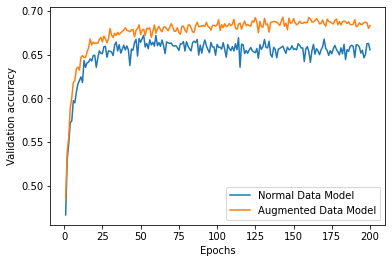

In [54]:
plt.plot(range(1,201),history_1.history['val_acc'], label ='Normal Data Model')
plt.plot(range(1,201),history_2.history['val_acc'], label ='Augmented Data Model')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.show()